In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-data/owid-covid-data.csv


In [2]:
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Data Set Uploading

In [3]:
covid_data  = pd.read_csv('/kaggle/input/covid-data/owid-covid-data.csv')
covid_data .head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
covid_data.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.088300e+04,80881.000000,79880.000000,7.130800e+04,71466.000000,79880.000000,80445.000000,80443.000000,79447.000000,70883.000000,...,74932.000000,51075.000000,75561.000000,76587.000000,59240.000000,58365.000000,37962.000000,68995.000000,78493.000000,75461.000000
mean,7.831798e+05,5604.033308,5585.467869,2.213695e+04,136.469272,120.766325,9510.073468,72.938160,72.944649,214.730388,...,19128.414355,13.332742,257.661707,7.811557,10.519893,32.653246,50.933986,3.030240,73.157342,0.727251
std,5.430880e+06,34624.141461,34003.378078,1.306374e+05,743.727647,680.831449,18359.244233,174.957856,148.341990,377.764525,...,19801.837679,19.937047,118.718704,3.967279,10.399880,13.474991,31.764199,2.464364,7.550804,0.150061
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.830000e+02,2.000000,6.714000,4.300000e+01,0.000000,0.000000,191.893000,0.177000,1.117500,6.591500,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.880000,0.602000
50%,9.758000e+03,68.000000,82.857000,3.010000e+02,2.000000,1.143000,1307.962000,7.327000,9.708000,36.992000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,1.042960e+05,743.000000,772.571000,2.923250e+03,17.000000,13.286000,9325.465000,65.078500,73.170500,229.299000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.730000,0.848000
max,1.420978e+08,880837.000000,776364.286000,3.029811e+06,17906.000000,14435.143000,165728.338000,8652.658000,2648.773000,2664.306000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


# Unique Values

In [5]:
covid_data.nunique()


iso_code                                   218
continent                                    6
location                                   218
date                                       475
total_cases                              43572
new_cases                                11325
new_cases_smoothed                       21553
total_deaths                             16573
new_deaths                                2680
new_deaths_smoothed                       6021
total_cases_per_million                  62451
new_cases_per_million                    35756
new_cases_smoothed_per_million           40279
total_deaths_per_million                 38499
new_deaths_per_million                    6926
new_deaths_smoothed_per_million           8247
reproduction_rate                          367
icu_patients                              2287
icu_patients_per_million                  4800
hosp_patients                             4449
hosp_patients_per_million                 7846
weekly_icu_ad

# Null Values

In [6]:
covid_data.isnull().sum()

iso_code                                     0
continent                                 4012
location                                     0
date                                         0
total_cases                               1822
new_cases                                 1824
new_cases_smoothed                        2825
total_deaths                             11397
new_deaths                               11239
new_deaths_smoothed                       2825
total_cases_per_million                   2260
new_cases_per_million                     2262
new_cases_smoothed_per_million            3258
total_deaths_per_million                 11822
new_deaths_per_million                   11664
new_deaths_smoothed_per_million           3258
reproduction_rate                        15947
icu_patients                             74084
icu_patients_per_million                 74084
hosp_patients                            72310
hosp_patients_per_million                72310
weekly_icu_ad

# Continents in terms of occurence of covid cases on basis of iso_codes

In [7]:
covid_data.continent.value_counts()[0:10]

Africa           21646
Europe           19868
Asia             19696
North America     9906
South America     5096
Oceania           2481
Name: continent, dtype: int64

# Collecting Asia Data from the given dataset

In [8]:
asia_data = covid_data[covid_data['continent'] =='Asia']
asia = asia_data[asia_data['date'] =='15-04-21']
asia = asia_data[~asia_data['location'].isin(['World','International'])]
asia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [9]:
top_10_asia_deaths  = asia.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34417,IND,Asia,India,2021-04-19,15320972.0,259167.0,233074.143,180530.0,1761.0,1353.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34416,IND,Asia,India,2021-04-18,15061805.0,273802.0,219155.429,178769.0,1619.0,1227.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34415,IND,Asia,India,2021-04-17,14788003.0,261394.0,204171.143,177150.0,1501.0,1125.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34414,IND,Asia,India,2021-04-16,14526609.0,234692.0,188669.000,175649.0,1341.0,1030.429,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34413,IND,Asia,India,2021-04-15,14291917.0,217353.0,175910.714,174308.0,1185.0,952.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


Text(0.5, 1.0, 'Total deaths across asian countries')

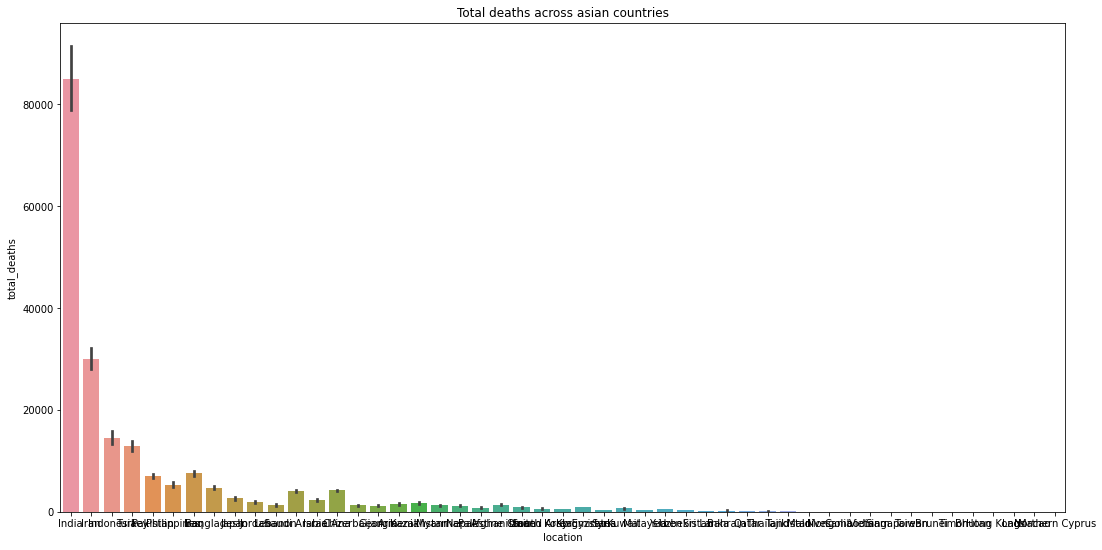

In [10]:
plt.figure(figsize=(18,9))
sns.barplot(x= top_10_asia_deaths['location'],y=top_10_asia_deaths['total_deaths'])
plt.title("Total deaths across asian countries")


# Asian countries with least number of total_cases being reported

In [11]:
least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
33972,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33973,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33974,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33975,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
33977,IND,Asia,India,2020-02-04,3.0,0.0,0.429,NaN,NaN,0.0,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


<AxesSubplot:xlabel='location', ylabel='total_cases_per_million'>

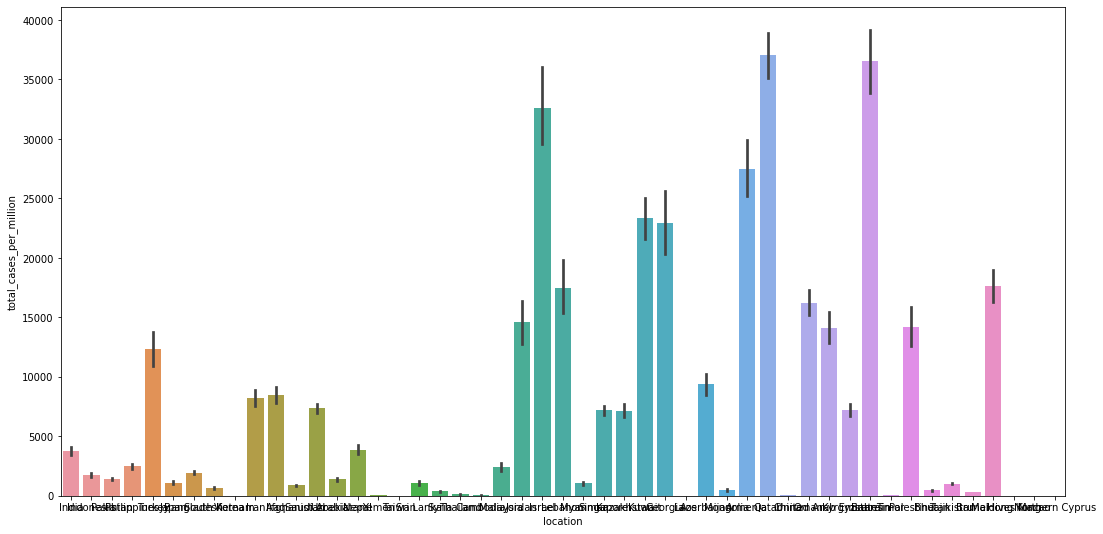

In [12]:
plt.figure(figsize = (18,9))
sns.barplot(x=least_asia_cases["location"], y= least_asia_cases["total_cases_per_million"])

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

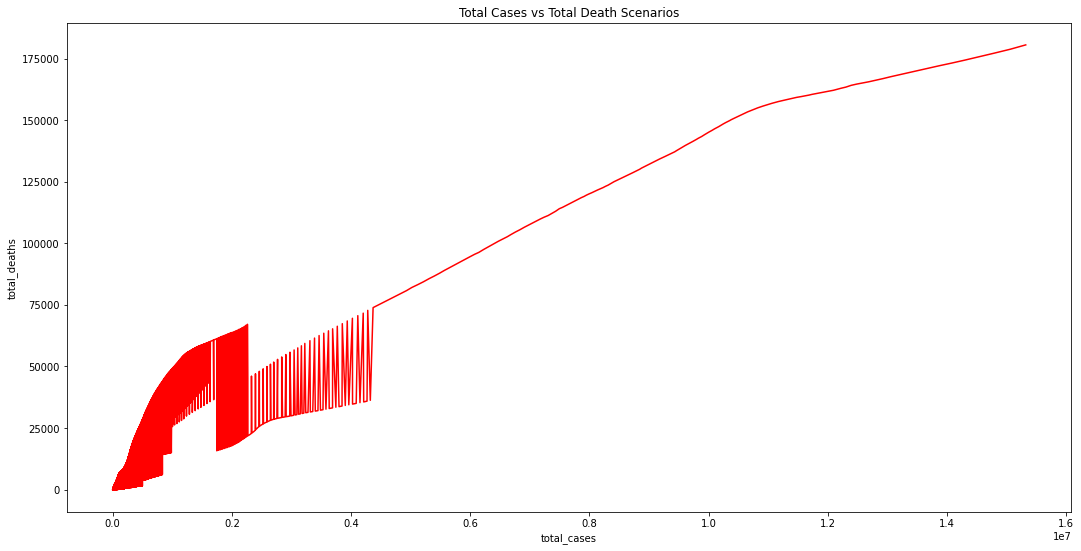

In [13]:
plt.figure(figsize=(18,9))
sns.lineplot(x='total_cases',y='total_deaths',data=asia,color="red")
plt.title("Total Cases vs Total Death Scenarios")